# Statistics - Descriptive

In [1]:
import warnings, platform
from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

## Package Load

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

## Data

### (1) Univariable data

In [5]:
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

### (2) Multivariable data
- 열이 변수의 의미를 가지에 해야 분석이 용이
- 행 하나에 1개의 결과가 있도록 정리

In [6]:
state = pd.read_csv("./Practical_Statictics/data/state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
shoes = pd.read_csv("./stats_for_python/3-2-2-shoes.csv")
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [8]:
fish_multi = pd.read_csv("./stats_for_python/3-2-1-fish_multi.csv")
fish_multi

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [9]:
### Grouping
group = fish_multi.groupby("species")
group.mean()

,length
species,
A,3.0
B,8.0


In [10]:
group.std(ddof=1)

,length
species,
A,1.0
B,2.0


In [11]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [12]:
### Contingency table
cross = pd.pivot_table(
    data = shoes,
    values = "sales",
    aggfunc = "sum",
    index = "store",
    columns = "color")
cross

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [14]:
lc_loans = pd.read_csv("./Practical_Statictics/data/lc_loans.csv")

crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [15]:
df = crosstab.copy().loc['A':'G', :]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


## Numerical Descriptives

### (1) Measures of central location

In [16]:
### sum
fish_data.sum()

40

In [17]:
### length
len(fish_data)

10

In [18]:
### mean
fish_data.mean()

4.0

In [19]:
state['Population'].mean()

6162876.3

In [20]:
### geometric mean
# 곱셈으로 계산하는 값들의 평균
stats.gmean([1.0, 0.00001, 10000000000.])

46.415888336127786

In [21]:
### harmonic mean
# 변화율의 평균
stats.hmean([1.0, 0.00001, 10000000000.])

2.9999700002999943e-05

In [22]:
### trim mean
stats.trim_mean(fish_data, 0.2) # trim 비율도 파라미터로 들어감

4.0

In [23]:
stats.trim_mean(state['Population'], 0.1)

4783697.125

In [24]:
### Median
np.median(fish_data)

4.0

In [25]:
state['Population'].median()

4436369.5

In [26]:
# 이상치의 영향
fish_data_2 = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 100])
print(np.mean(fish_data_2), np.median(fish_data_2))

13.4 4.0


In [27]:
### weighted mean
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [28]:
### mode
stats.mode(fish_data)

ModeResult(mode=array([4]), count=array([4]))

In [29]:
stats.mode(state['Murder.Rate'])

ModeResult(mode=array([1.6]), count=array([3]))

In [30]:
state['Murder.Rate'].mode()

0    1.6
1    2.0
2    5.7
Name: Murder.Rate, dtype: float64

### (2) Measures of variability

In [31]:
### variance
# np.var(fish_data, ddof=0) # 동일
fish_data.var()

1.2

In [32]:
### Unbiased variance
# N-1로 나눔
np.var(fish_data, ddof=1) 

1.3333333333333333

In [33]:
### Std. deviation
# np.std(fish_data, ddof=0)
np.std(fish_data, ddof=1)

1.1547005383792515

In [34]:
state['Population'].std()

6848235.347401142

In [35]:
### Standardization
# 평균 0, 표준편차 1
print(np.mean((fish_data - fish_data.mean())/np.std(fish_data, ddof=0)))
print(np.std((fish_data - fish_data.mean())/np.std(fish_data, ddof=0)))

2.2204460492503132e-17
1.0


In [36]:
### Coefficient of Vriation
# 변동계수
# SD/mean

# max variation along rows of A; 
# rows: axis=0, cols: axis=1
# = np.std(fish_data, ddof=1)/np.mean(fish_data)
stats.variation(fish_data, axis=0, ddof=1) # 모집단의 변동계수

0.28867513459481287

In [37]:
from statsmodels import robust

In [38]:
### MAD (Mean Absolute Deviation from the median)
# 중간값과의 편차의 절댓값의 중간값
robust.scale.mad(state['Population'])

3849876.1459979336

In [39]:
### Mean absolute deviation
# 편차 절대평균
def mean_absolute_deviation(data, axis=None):
    return np.mean(np.abs(data - np.mean(data, axis)), axis)

mean_absolute_deviation(state['Population'])

4450933.356000001

In [40]:
### Maximum, Minimum
### Range: Max - Min
fish_data.max() - fish_data.min()

4

In [41]:
### Quantile, Percentile
### IQR: Inter Quantile Range
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [42]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [43]:
fish_data_3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(np.percentile(fish_data_3, 25), np.percentile(fish_data_3, 75))

3.0 7.0


### (3) Measures of Relationship

In [44]:
### Covariance
cov_data = pd.read_csv("./stats_for_python/3-2-3-cov.csv")
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [45]:
x = cov_data["x"]
y = cov_data["y"]

np.cov(x, y, ddof=0)

array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

In [46]:
np.cov(x, y, ddof=1)

array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [47]:
### Correlation
# N이든 N-1이든 동일한 값이 됨
cov_data.corr()

,x,y
x,1.000000,0.759272
y,0.759272,1.000000


In [48]:
sp500_sym = pd.read_csv("./Practical_Statictics/data/sp500_sectors.csv")
sp500_px = pd.read_csv("./Practical_Statictics/data/sp500_data.csv.gz", index_col=0)

In [49]:
# Determine telecommunications symbols
telecom_symbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecom_symbols]
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


### (4) Measure of distribution shape

In [50]:
### Skewness
# DataFrame/Series 형태로 변경하여 출력
state['Population'].skew()

2.6426346412748765

In [51]:
stats.skew(state['Population'], bias=False) # correction = True

2.642634641274876

In [52]:
### Kurtosis
state['Population'].kurtosis()

8.722114728161502

In [53]:
stats.kurtosis(state['Population'], bias=False) # correction = True

8.722114728161502

## Probability

### (1) Permutation & Combination

In [54]:
import itertools

In [55]:
tmp_list = list(range(10))
perm = len(list(itertools.permutations(tmp_list, 3)))
comb = len(list(itertools.combinations(tmp_list, 3)))
print(perm, comb)

720 120


In [56]:
### 중복순열과 중복조합
perm_with_replacement = len(list(itertools.product(tmp_list, repeat=3)))
comb_with_replacement = len(list(itertools.combinations_with_replacement(tmp_list, 3)))
print(perm_with_replacement, comb_with_replacement)

1000 220


In [57]:
from math import perm
from math import comb

In [58]:
### Python 3.8 이상에 적용
print(perm(10, 3))
print(comb(10, 3))

720
120


### (2) Bayes Theorem

## Discrete Probability Distribution

### (1) Binomial
- 베르누이 시행: 2 종류의 결과 중 하나만 발생시키는 시행
- 성공확률 p, N 회의 독립 베르누이 시행을 했을 때, 성공한 횟수 X의 확률분포

In [59]:
# PMF
stats.binom.pmf(k=1, n=2, p=0.5) # 성공횟수, 시행횟수, 성공확률

0.5000000000000002

In [60]:
# CDF
stats.binom.cdf(k=2, n=5, p=0.1)

0.99144

In [61]:
np.random.seed(1)
stats.binom.rvs(n=10, p=0.2, size=5) # 시행횟수 n, 성공확률 p, 5번 반복 sampling

array([2, 3, 0, 1, 1])

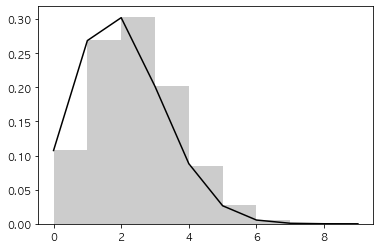

In [62]:
binomial = stats.binom(n=10, p=0.2)

np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)

m = np.arange(0, 10, 1)
sns.distplot(rvs_binomial, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, binomial.pmf(k=m), color='black')
plt.show()

### (2) Multinomial
- 이항분포의 확장형으로, 확률변수의 범주가 3가지 이상인 경우 

In [63]:
# n: Number of trials
# p (array-like): Probability of a trial falling into each category; should sum to 1
rv = stats.multinomial(8, [0.3, 0.2, 0.5])
rv.pmf([1, 3, 4])

0.04200000000000007

In [64]:
stats.multinomial.pmf([[3, 4], [3, 5]], n=[7, 8], p=[.3, .7])

array([0.2268945 , 0.25412184])

In [65]:
stats.multinomial.cov([4, 5], [[.3, .7], [.4, .6]])

array([[[ 0.84, -0.84],
        [-0.84,  0.84]],

       [[ 1.2 , -1.2 ],
        [-1.2 ,  1.2 ]]])

### (3) Poisson
- 카운트 데이터 (0 이상의 정수)의 확률분포
- p -> 0, N -> Inf의 조건에서 이항분포 Np=λ

In [66]:
stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [67]:
stats.poisson.cdf(k=2, mu=5)

0.12465201948308108

In [68]:
# λ=2인 Possion
np.random.seed(1)
stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

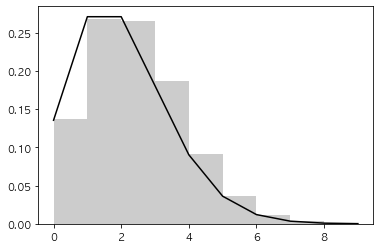

In [69]:
poisson = stats.poisson(mu=2)

np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)
pmf_poisson = poisson.pmf(k=m)

sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, pmf_poisson, color='black')

Mean: N*p = 2.0


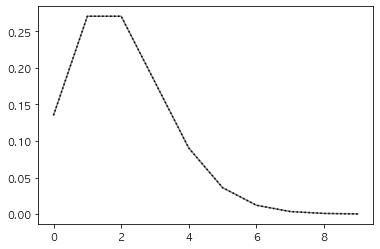

In [70]:
# N이 크고 p가 작을 때의 이항분포
N = 100000000
p = 0.00000002
print("Mean: N*p =", N*p)
binomial_2 = stats.binom(n=N, p=p)

pmf_binomial_2 = binomial_2.pmf(k=m)

sns.lineplot(x=m, y=pmf_poisson, color='gray')
sns.lineplot(x=m, y=pmf_binomial_2, color='black', linestyle='dotted')
plt.show()

### (5) Negative Binomial
- 카운트 데이터의 확률분포
- 성공 횟수 r회가 될 때까지의 시행횟수를 확률변수로 둠
- Poission보다 분산이 큰 경우

In [71]:
n, p = 5, 0.5 # 0.5 확률의 시행을 5회 성공할 때까의 시행횟수가 확률변수
mean, var, skew, kurt = stats.nbinom.stats(n, p, moments='mvsk')

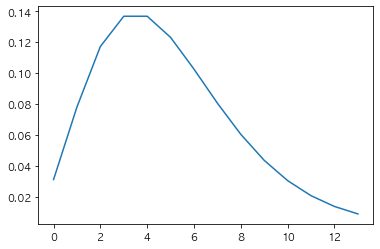

In [72]:
x = np.arange(stats.nbinom.ppf(0.01, n, p), stats.nbinom.ppf(0.99, n, p))
sns.lineplot(x=x, y=stats.nbinom(n, p).pmf(x))
plt.show()

### (6) Geometric
- 1회 성공까지의 시행횟수가 확률변수
- Negative Binomial의 특수 케이스

In [73]:
p = 0.5
mean, var, skew, kurt = stats.geom.stats(p, moments='mvsk')

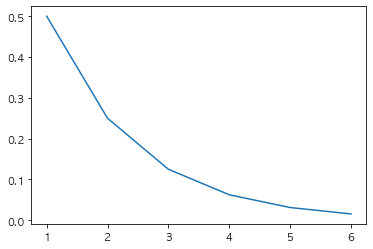

In [74]:
x = np.arange(stats.geom.ppf(0.01, p), stats.geom.ppf(0.99, p))
sns.lineplot(x=x, y=stats.geom(p).pmf(x))
plt.show()

### (7) Hypergeometric
- 비복원 추출(독립이 아닌) 사건에서의 이항확률분포
- 모집단 개수 N, 모집단에서 사건이 일어난 횟수 D, 샘플 개수 n
- p = D/N
- X: 표본에서 사건의 개수에 해당하는 개수
- 평균 np, 표준편차 np(1-p)((N-n)/(N-1)) 

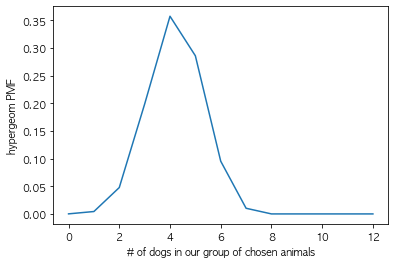

In [75]:
[N, D, n] = [20, 7, 12]

rv = stats.hypergeom(N, D, n)
x = np.arange(0, n + 1)

pmf_dogs = rv.pmf(x)

fig = plt.figure()

sns.lineplot(x=x, y=pmf_dogs)
plt.xlabel('# of dogs in our group of chosen animals')
plt.ylabel('hypergeom PMF')
plt.show()

## Continuous Probability Distribution

### (1) Uniform
- 분포가 특정 범위 내에서 균등하게 나타나는 분포

In [76]:
stats.uniform(loc=0, scale=1)

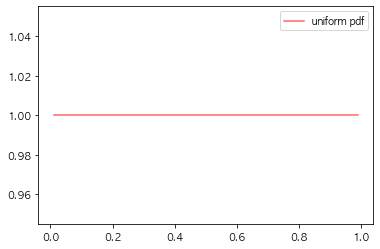

In [77]:
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
sns.lineplot(x=x, y=stats.uniform(loc=0, scale=1).pdf(x), color='red', alpha=0.6, label='uniform pdf') # location과 scale 조정해서 분포 생성 가능
plt.show()

### (2) Normal

In [78]:
### PDF
stats.norm.pdf(loc=4, scale=0.8, x=3) # 확률변수 x가 3일때의 확률값

0.2283113567362774

In [79]:
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

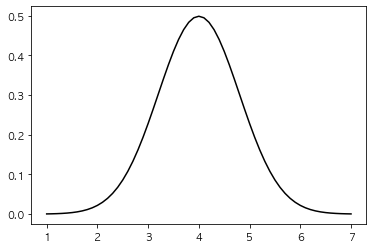

In [80]:
x_plot = np.arange(start=1, stop=7.1, step=0.1)
sns.lineplot(x=x_plot, y=stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color = 'black')
plt.show()

In [81]:
### CDF
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

In [82]:
### PPF (Percent Point Function)
# 누적확률이 q가 되는 확률변수 값
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.4320288123679563

In [83]:
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=3)
stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)

3.0000000000000004

In [84]:
# q가 0.5인 지점 = 평균
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

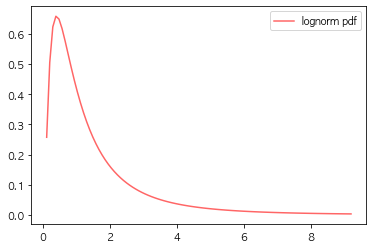

In [85]:
### (참고) Log-normal distribution
# 로그를 취한 변수가 정규분포를 따르는 경우
# ln(X) ~ N(mu, sigma)
s = 0.954 # shape parameter
x = np.linspace(stats.lognorm.ppf(0.01, s), stats.lognorm.ppf(0.99, s), 100)
sns.lineplot(x=x, y=stats.lognorm.pdf(x, s), color='red', alpha=0.6, label='lognorm pdf')
plt.show()

### (3) Student T
- 평균 검정을 위해 만들어진 분포
- 표준정규분포에서, 모분산 simga**2가 Chi-sq(n)으로 추정된 경우
- 표준정규분포보다 꼬리가 더 두꺼운 형태

<AxesSubplot:>

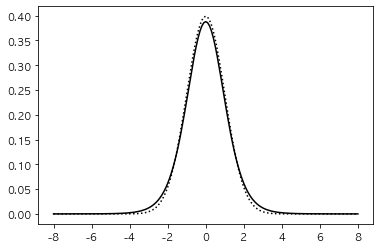

In [86]:
# 평균 0, 분산 n/(n-2)
# n이 커지면 표준정규분포에 근사
x = np.arange(start=-8, stop=8.1, step=0.1)
sns.lineplot(x=x, y=stats.norm.pdf(x=x), color='black', linestyle='dotted')
sns.lineplot(x=x, y=stats.t.pdf(x=x, df=9), color='black')

### (4) Chi-square
- k개의 서로 독립적인 표준정규 확률변수를 각각 제곱한 다음 합해서 얻어지는 분포
- Gamma 분포의 특수한 형태
- Chi-sq ~ Gamma(r/2, 2), r은 자유도

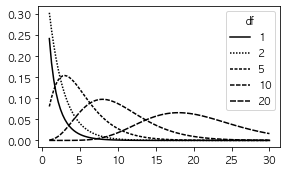

In [87]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

### (5) F
- 두 개의 카이제곱 변수의 비로 표현되는 분포

In [88]:
stats.f.pdf(sorted(x), dfn=1, dfd=10)

array([2.30361989e-01, 1.75326213e-01, 1.37509636e-01, 1.10124770e-01,
       8.95846844e-02, 7.37825167e-02, 6.13877908e-02, 5.15150896e-02,
       4.35514142e-02, 3.70590924e-02, 3.17178318e-02, 2.72884591e-02,
       2.35893389e-02, 2.04805419e-02, 1.78529302e-02, 1.56204596e-02,
       1.37146444e-02, 1.20805099e-02, 1.06735892e-02, 9.45766471e-03,
       8.40305134e-03, 7.48527663e-03, 6.68405716e-03, 5.98249794e-03,
       5.36646102e-03, 4.82406438e-03, 4.34528130e-03, 3.92161829e-03,
       3.54585461e-03, 3.21183059e-03, 2.91427459e-03, 2.64866111e-03,
       2.41109373e-03, 2.19820826e-03, 2.00709224e-03, 1.83521781e-03,
       1.68038554e-03, 1.54067721e-03, 1.41441605e-03, 1.30013318e-03,
       1.19653908e-03, 1.10249941e-03, 1.01701439e-03, 9.39201148e-04,
       8.68278623e-04, 8.03554613e-04, 7.44414601e-04, 6.90312134e-04,
       6.40760499e-04, 5.95325512e-04, 5.53619262e-04, 5.15294670e-04,
       4.80040738e-04, 4.47578418e-04, 4.17656983e-04, 3.90050860e-04,
      

### (6) Exponential
- 한 사건이 일어날때까지의 시간이나 거리에 대한 분포

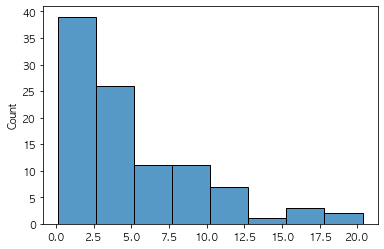

In [89]:
sample = stats.expon.rvs(scale=5, size=100) # 주기별 평균 사건 수 5
sns.histplot(sample)
plt.show()

### (7)  Weibull
- 사건 발생률이 시간에 따라 변화
    - beta > 1이면 발생률이 시간이 지남에 따라 증가, 작으면 감소
- 지수분포의 일반화 버전

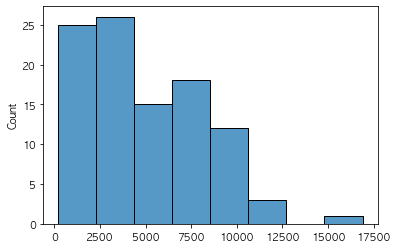

In [90]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100) # beta 1.5
sns.histplot(sample)
plt.show()

### (8) Gamma
- shape (alpha), scale (beta)
- 지수 분포나 포아송 분포 등의 매개변수에 대한 켤레 사전 확률 분포이며, 이에 따라 베이즈 확률론에서 사전 확률 분포로 사용
- 사건이 k번 발생할 때까지의 시간 ~ Gamma(k, 1/lambda). lambda는 포아송 분포의 파라미터
    - 지수분포는 Gamma(1, 1/lambda)와 동일

In [91]:
x = np.linspace(0, 20, 101)

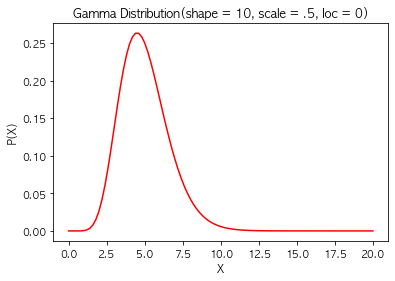

In [92]:
y = stats.gamma(10, 0, 0.5).pdf(x)        

sns.lineplot(x=x, y=y, color='red')        
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, scale = .5, loc = 0)') 
plt.show()

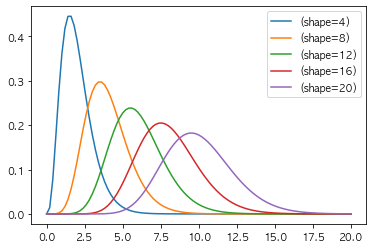

In [93]:
for shape in np.arange(4, 24, 4):
    sns.lineplot(x=x, y=stats.gamma(shape, 0, 0.5).pdf(x), label='(shape=' + str(shape) + ')')

plt.legend()
plt.show()

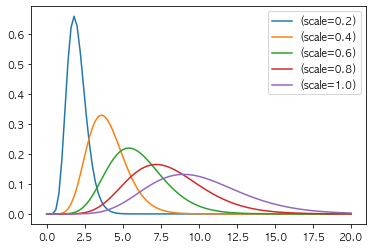

In [94]:
for scale in np.arange(2, 12, 2) / 10:
    sns.lineplot(x=x, y=stats.gamma(10, 0, scale).pdf(x), label='(scale=' + str(scale) + ')')

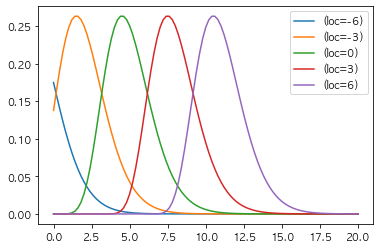

In [95]:
for loc in np.arange(5) * 3 - 6:
    sns.lineplot(x=x, y=stats.gamma(10, loc, 0.5).pdf(x), label='(loc=' + str(loc) + ')')
plt.legend()
plt.show()

### (9) Beta
- 두 개의 감마분포의 조합으로 만들어지는 파생분포
- Beta ~ Gamma(alpha + beta, 1)
- 0부터 1까지의 값을 가질 수 있는 베르누이시행 모수 𝜇의 값을 베이지안 추정한 결과를 표현한 것
- 사전정보가 없는 베이즈 통계에서 사전확률로 많이 쓰임

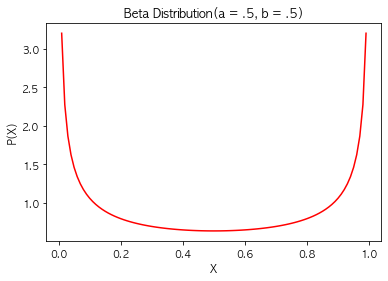

In [96]:
x = np.linspace(.01, .99, 99)
a = .5
b = .5
y1 = stats.beta(a, b).pdf(x)        

sns.lineplot(x=x, y=y1, color='red')        
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Beta Distribution(a = .5, b = .5)') 
plt.show()

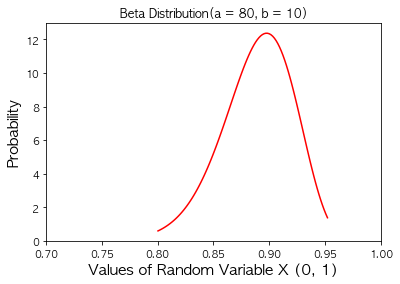

In [97]:
# Set the shape paremeters
a, b = 80, 10

# Generate the value between
x = np.linspace(stats.beta.ppf(0.01, a, b), stats.beta.ppf(0.99, a, b), 100)

# Plot the beta distribution
plt.xlim(0.7, 1)
sns.lineplot(x=x, y=stats.beta.pdf(x, a, b), color='red')
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.title('Beta Distribution(a = 80, b = 10)') 
plt.show()

### (10) Dirichlet
- 베타 분포의 다변수 확장
- 베이즈 통계학에서 다항 분포에 대한 사전 켤레확률분포 

In [98]:
quantiles = np.array([0.2, 0.2, 0.6])  # specify quantiles
alpha = np.array([0.4, 5, 15])  # specify concentration parameters

stats.dirichlet.pdf(quantiles, alpha)

0.2843831684937255

In [99]:
### log scale
stats.dirichlet.logpdf(quantiles, alpha)

-1.2574327653159187

In [100]:
stats.dirichlet.rvs(alpha, size=2, random_state=2)

array([[0.01639427, 0.1292273 , 0.85437844],
       [0.00156917, 0.19033695, 0.80809388]])